In [5]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the train data

In [6]:
pd.set_option('display.max_columns', None)  # Change 10 to the desired number of columns

In [7]:
### Read accounts train data

with open("/content/accounts_data_train.json", 'r') as file:
      data = json.load(file)

# Flatten the nested structure and create DataFrame
records = [item for sublist in data for item in sublist]
df_accounts_train = pd.json_normalize(records)

In [128]:
### Read accounts test data

with open("/content/accounts_data_test.json", 'r') as file:
      data = json.load(file)

# Flatten the nested structure and create DataFrame
records = [item for sublist in data for item in sublist]
df_accounts_test = pd.json_normalize(records)

In [8]:
### Read enquiry train data
with open("/content/enquiry_data_train.json", 'r') as file:
    data = json.load(file)

# Flatten the nested structure and create DataFrame
records = [item for sublist in data for item in sublist]
df_enquiry_train = pd.json_normalize(records)

In [129]:
### Read enquiry test data
with open("/content/enquiry_data_test.json", 'r') as file:
    data = json.load(file)

# Flatten the nested structure and create DataFrame
records = [item for sublist in data for item in sublist]
df_enquiry_test = pd.json_normalize(records)

In [9]:
df_flag_train = pd.read_csv("/content/train_flag.csv")

In [130]:
df_flag_test = pd.read_csv("/content/test_flag.csv")

In [10]:
df_flag_train.head(10)

,uid,NAME_CONTRACT_TYPE,TARGET
0,XDA69787158,Cash loans,0
1,BSE47789733,Cash loans,0
2,NTJ92213825,Cash loans,0
3,TCQ47571695,Cash loans,0
4,WJZ68772744,Cash loans,0
5,FZI10689602,Cash loans,0
6,QSQ64792661,Cash loans,0
7,DBK56652751,Cash loans,1
8,ORJ66415010,Revolving loans,0
9,XOF90530766,Cash loans,0


In [11]:
print(df_flag_train['uid'].nunique())
print(len(df_flag_train['uid']))

261383
261383


In [12]:
df_flag_train['NAME_CONTRACT_TYPE'].value_counts()  ### There are two forms of loans , which are Cash loans and revolving loans

,count
NAME_CONTRACT_TYPE,
Cash loans,236524
Revolving loans,24859


In [13]:
df_flag_train.groupby(by = ['NAME_CONTRACT_TYPE'])['TARGET'].sum()  / df_flag_train.groupby(by = ['NAME_CONTRACT_TYPE'])['TARGET'].count()

,TARGET
NAME_CONTRACT_TYPE,
Cash loans,0.083294
Revolving loans,0.054548


In [14]:
#### As per the train data, 8.3% of cash loans are bad loans and 5.45% of revolving loans are bad loans.

#### Loading the test data

In [15]:
# ### Read accounts test data
# with open("/content/accounts_data_test.json", 'r') as file:
#     data = json.load(file)

# # Flatten the nested structure and create DataFrame
# records = [item for sublist in data for item in sublist]
# df_accounts_test = pd.json_normalize(records)

In [16]:
# df_accounts_test.head(2)

In [17]:
# ### Read enquiry test data
# with open("/content/enquiry_data_test.json", 'r') as file:
#     data = json.load(file)

# # Flatten the nested structure and create DataFrame
# records = [item for sublist in data for item in sublist]
# df_enquiry_test = pd.json_normalize(records)

In [18]:
# df_flag_test = pd.read_csv("/content/test_flag.csv")

#### Analysis on Train data

#### Merging all the train data

In [19]:
df_accounts_train.isna().sum()   #### Check nulls in accounts train data

,0
credit_type,0
loan_amount,3
amount_overdue,0
open_date,0
closed_date,463035
payment_hist_string,0
uid,0


In [20]:
df_enquiry_train.isna().sum()  ## Check for nulls from enquiry train data

,0
enquiry_type,0
enquiry_amt,0
enquiry_date,0
uid,0


In [21]:
df_accounts_train.describe()  ### Describe accounts train data

## there is approx 12.4 Lakh loan data in the training set
## the mean loan amount is 3.52 Lakhs, It has a relatively higher standard deviation than mean
## 25% have loan amount uptp 51,147, 50% at 1.24 Lakhs, 75% at 3.87 lakh, and max is at outlier of 39.6 Cr

## the data has outlier value and loan amount looks impacted by high outliers,
## from the description, more than 75% of loans are no more overdue

,loan_amount,amount_overdue
count,1.245307e+06,1.245310e+06
mean,3.523541e+05,4.202288e+01
std,1.109812e+06,6.668687e+03
min,0.000000e+00,0.000000e+00
25%,5.114700e+04,0.000000e+00
50%,1.246590e+05,0.000000e+00
75%,3.087000e+05,0.000000e+00
max,3.960000e+08,3.756681e+06


In [22]:
df_accounts_train[df_accounts_train['amount_overdue'] > 0].describe()

## Among the overdue loan amounts, 30,910 accounts iare overdue,
## the standard loan amounts at 50% and 75% of the loan amounts are higher than overall.
## the loan amount at last quartile is lower although the loan due amount is relatively higher than lower quarters

,loan_amount,amount_overdue
count,3.091000e+03,3.091000e+03
mean,4.190259e+05,1.693029e+04
std,9.688057e+05,1.328025e+05
min,0.000000e+00,4.500000e-02
25%,6.750000e+04,4.500000e+01
50%,1.575000e+05,2.745900e+02
75%,4.120200e+05,8.730000e+02
max,2.028015e+07,3.756681e+06


In [23]:
df_enquiry_train.describe()  ### Describe accounts train data

,enquiry_amt
count,1.909926e+06
mean,1.160423e+05
std,8.207031e+04
min,1.007000e+03
25%,5.600000e+04
50%,1.080000e+05
75%,1.590000e+05
max,4.999950e+05


In [24]:
df_flag_train.describe()

,TARGET
count,261383.000000
mean,0.080560
std,0.272159
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [25]:

df_flag_train.head(2)

,uid,NAME_CONTRACT_TYPE,TARGET
0,XDA69787158,Cash loans,0
1,BSE47789733,Cash loans,0


In [26]:


print(df_flag_train['uid'].nunique())
print(len(df_flag_train['uid']))  ## the UIDs are unique

261383
261383


In [27]:
df_flag_train.groupby(by= 'TARGET')['uid'].count()/len(df_flag_train)*100

### Approx 91.94% of loans are good loans and remaining are categorised as bad loans

,uid
TARGET,
0,91.944006
1,8.055994


#### Feature engineering on the enquiry data

In [28]:
#### Extracting the Month_year and Year from the enquiry date in enquiry train table

In [29]:
df_enquiry_train['enquiry_date'] = pd.to_datetime(df_enquiry_train['enquiry_date'])
df_enquiry_train['Month_Year'] = df_enquiry_train['enquiry_date'].dt.strftime('%b-%y')
df_enquiry_train['Year'] = df_enquiry_train['enquiry_date'].dt.year
df_enquiry_train.head(2)

,enquiry_type,enquiry_amt,enquiry_date,uid,Month_Year,Year
0,Interbank credit,168839,2020-11-08,AAA08065248,Nov-20,2020
1,Mobile operator loan,268392,2020-09-20,AAA08065248,Sep-20,2020


In [132]:
df_enquiry_test['enquiry_date'] = pd.to_datetime(df_enquiry_test['enquiry_date'])
df_enquiry_test['Month_Year'] = df_enquiry_test['enquiry_date'].dt.strftime('%b-%y')
df_enquiry_test['Year'] = df_enquiry_test['enquiry_date'].dt.year
df_enquiry_test.head(2)

,enquiry_type,enquiry_amt,enquiry_date,uid,Month_Year,Year
0,Car loan,143000,2020-12-13,AAA02107680,Dec-20,2020
1,Real estate loan,174000,2020-12-01,AAA14437029,Dec-20,2020



### Making another enquiry datamart, where enquiry is grouped bais UID, Month_year,summed up with enquiry count and amount

In [30]:
df_enquiry_train_group = df_enquiry_train.groupby(by = ['uid','Month_Year','enquiry_type','Year']).agg(sum_value = ('enquiry_amt', 'sum'), count_value =('enquiry_date', 'count')).reset_index()

In [133]:
df_enquiry_test_group = df_enquiry_test.groupby(by = ['uid','Month_Year','enquiry_type','Year']).agg(sum_value = ('enquiry_amt', 'sum'), count_value =('enquiry_date', 'count')).reset_index()

In [31]:
df_enquiry_train_group.head()

,uid,Month_Year,enquiry_type,Year,sum_value,count_value
0,AAA08065248,Dec-20,Loan for purchase of shares (margin lending),2020,161562,1
1,AAA08065248,Feb-20,Revolving loans,2020,364751,1
2,AAA08065248,Jun-19,Loan for purchase of shares (margin lending),2019,315591,1
3,AAA08065248,Jun-20,Mobile operator loan,2020,36082,1
4,AAA08065248,Mar-19,Revolving loans,2019,169056,1


In [32]:
# df_enquiry_train_group['count_value'].unique()

In [33]:
### Visualising the enquiry table

#df_enquiry_train_group

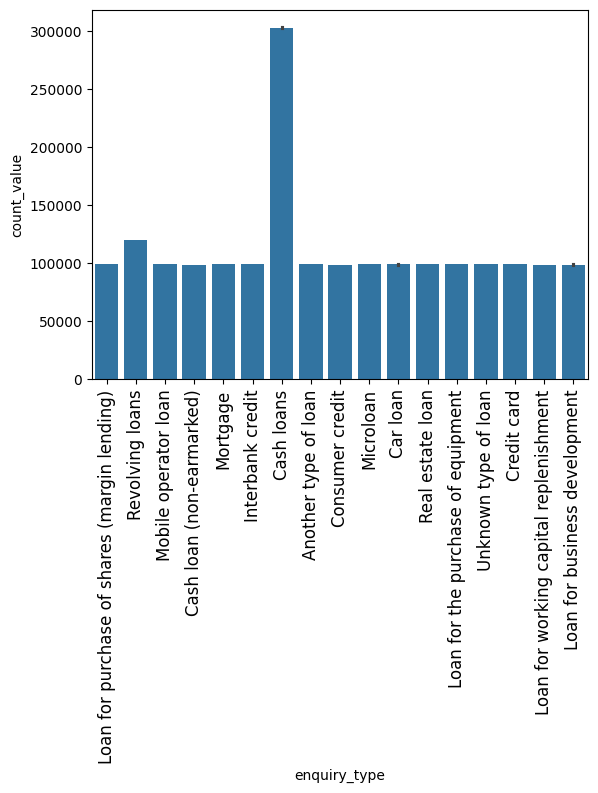

In [34]:
sns.barplot(x='enquiry_type', y='count_value', data=df_enquiry_train_group, estimator='sum')

plt.xticks(rotation=90, fontsize=12)  # Change the number to control the size

plt.show()

In [35]:
df_enquiry_train_group_2 = df_enquiry_train_group.groupby(by=['uid','enquiry_type'])[['count_value', 'sum_value']].sum().reset_index()

In [134]:
df_enquiry_test_group_2 = df_enquiry_test_group.groupby(by=['uid','enquiry_type'])[['count_value', 'sum_value']].sum().reset_index()

In [36]:
df_enquiry_train_group_2.head(2)

,uid,enquiry_type,count_value,sum_value
0,AAA08065248,Cash loan (non-earmarked),1,227459
1,AAA08065248,Interbank credit,3,476924


In [37]:
df_enquiry_train_group_2['Average_sum'] = df_enquiry_train_group_2['sum_value'] / df_enquiry_train_group_2['count_value']

In [135]:
df_enquiry_test_group_2['Average_sum'] = df_enquiry_test_group_2['sum_value'] / df_enquiry_test_group_2['count_value']

In [38]:
df_enquiry_train_group_2.head(2)

,uid,enquiry_type,count_value,sum_value,Average_sum
0,AAA08065248,Cash loan (non-earmarked),1,227459,227459.000000
1,AAA08065248,Interbank credit,3,476924,158974.666667


In [136]:
df_enquiry_test_group_2.head(2)

,uid,enquiry_type,count_value,sum_value,Average_sum
0,AAA02107680,Car loan,1,143000,143000.0
1,AAA14437029,Car loan,1,12000,12000.0


In [39]:
# df_enquiry_train['enquiry_date'].min()

In [40]:
# df_enquiry_train['enquiry_date'].max()

In [41]:
df_enquiry_train_group.head()

,uid,Month_Year,enquiry_type,Year,sum_value,count_value
0,AAA08065248,Dec-20,Loan for purchase of shares (margin lending),2020,161562,1
1,AAA08065248,Feb-20,Revolving loans,2020,364751,1
2,AAA08065248,Jun-19,Loan for purchase of shares (margin lending),2019,315591,1
3,AAA08065248,Jun-20,Mobile operator loan,2020,36082,1
4,AAA08065248,Mar-19,Revolving loans,2019,169056,1


In [42]:
df_enquiry_train.head(2)

,enquiry_type,enquiry_amt,enquiry_date,uid,Month_Year,Year
0,Interbank credit,168839,2020-11-08,AAA08065248,Nov-20,2020
1,Mobile operator loan,268392,2020-09-20,AAA08065248,Sep-20,2020


In [43]:
# df_enquiry_train['Month_Year']

In [44]:
df_enquiry_train['Quarter'] = df_enquiry_train['enquiry_date'].dt.to_period('Q').astype(str)

In [137]:
df_enquiry_test['Quarter'] = df_enquiry_test['enquiry_date'].dt.to_period('Q').astype(str)

In [45]:
df_enquiry_train_group.head(2)

,uid,Month_Year,enquiry_type,Year,sum_value,count_value
0,AAA08065248,Dec-20,Loan for purchase of shares (margin lending),2020,161562,1
1,AAA08065248,Feb-20,Revolving loans,2020,364751,1


In [46]:
# sns.lineplot(x='Year', y='count_value',  hue='enquiry_type', data=df_enquiry_train_group, estimator='sum', marker='o')

# # Customize plot
# plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels if needed
# plt.yticks(fontsize=12)  # Set y-axis label size
# plt.xlabel('Financial Quarter', fontsize=14)
# plt.ylabel('Sum of Value', fontsize=12)
# plt.title('Sum of Values by Financial Quarter', fontsize=12)

# # Display the plot
# plt.show()

In [47]:
# df_enquiry_train_group.groupby(by = ['Month_Year'])['sum_value'].sum()

In [48]:
df_enquiry_train.head(2)

,enquiry_type,enquiry_amt,enquiry_date,uid,Month_Year,Year,Quarter
0,Interbank credit,168839,2020-11-08,AAA08065248,Nov-20,2020,2020Q4
1,Mobile operator loan,268392,2020-09-20,AAA08065248,Sep-20,2020,2020Q3


In [49]:
df_enquiry_train_group.head(2)

,uid,Month_Year,enquiry_type,Year,sum_value,count_value
0,AAA08065248,Dec-20,Loan for purchase of shares (margin lending),2020,161562,1
1,AAA08065248,Feb-20,Revolving loans,2020,364751,1


In [50]:
### we are performing one hot encoding on the NAME_CONTRACT_TYPE dataset. For each contract type, if the Target is 1, we can consider the
### loan is approved, else 0 means loan is unapproved

In [51]:
print(df_enquiry_train_group['uid'].nunique())
print(len(df_enquiry_train_group['uid']))

261383
1869958


In [52]:
df_enquiry_train_group_2.head(2)

,uid,enquiry_type,count_value,sum_value,Average_sum
0,AAA08065248,Cash loan (non-earmarked),1,227459,227459.000000
1,AAA08065248,Interbank credit,3,476924,158974.666667


In [53]:
df_enquiry_train_Encoded = pd.get_dummies(df_enquiry_train_group_2, columns =['enquiry_type'])

In [138]:
df_enquiry_test_Encoded = pd.get_dummies(df_enquiry_test_group_2, columns =['enquiry_type'])

In [54]:
df_enquiry_train_Encoded.head(2)

,uid,count_value,sum_value,Average_sum,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
0,AAA08065248,1,227459,227459.000000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,AAA08065248,3,476924,158974.666667,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [55]:
list(df_enquiry_train_Encoded.columns)

['uid',
 'count_value',
 'sum_value',
 'Average_sum',
 'enquiry_type_Another type of loan',
 'enquiry_type_Car loan',
 'enquiry_type_Cash loan (non-earmarked)',
 'enquiry_type_Cash loans',
 'enquiry_type_Consumer credit',
 'enquiry_type_Credit card',
 'enquiry_type_Interbank credit',
 'enquiry_type_Loan for business development',
 'enquiry_type_Loan for purchase of shares (margin lending)',
 'enquiry_type_Loan for the purchase of equipment',
 'enquiry_type_Loan for working capital replenishment',
 'enquiry_type_Microloan',
 'enquiry_type_Mobile operator loan',
 'enquiry_type_Mortgage',
 'enquiry_type_Real estate loan',
 'enquiry_type_Revolving loans',
 'enquiry_type_Unknown type of loan']

In [191]:
df_enquiry_train_Encoded_2 = df_enquiry_train_Encoded.groupby(['uid'])[['count_value', 'sum_value',
                                                                              'enquiry_type_Another type of loan',
                                                                              'enquiry_type_Car loan', 'enquiry_type_Cash loan (non-earmarked)', 'enquiry_type_Cash loans',
                                                                              'enquiry_type_Consumer credit',
                                                                              'enquiry_type_Credit card',
                                                                              'enquiry_type_Interbank credit',
                                                                              'enquiry_type_Loan for business development',
                                                                              'enquiry_type_Loan for purchase of shares (margin lending)',
                                                                              'enquiry_type_Loan for the purchase of equipment',
                                                                              'enquiry_type_Loan for working capital replenishment',
                                                                              'enquiry_type_Microloan',
                                                                              'enquiry_type_Mobile operator loan',
                                                                              'enquiry_type_Mortgage',
                                                                              'enquiry_type_Real estate loan',
                                                                              'enquiry_type_Revolving loans',
                                                                              'enquiry_type_Unknown type of loan']].sum().reset_index()

In [189]:
df_enquiry_test_Encoded_2 = df_enquiry_test_Encoded.groupby(['uid'])[['count_value', 'sum_value',
                                                                              'enquiry_type_Another type of loan',
                                                                              'enquiry_type_Car loan', 'enquiry_type_Cash loan (non-earmarked)', 'enquiry_type_Cash loans',
                                                                              'enquiry_type_Consumer credit',
                                                                              'enquiry_type_Credit card',
                                                                              'enquiry_type_Interbank credit',
                                                                              'enquiry_type_Loan for business development',
                                                                              'enquiry_type_Loan for purchase of shares (margin lending)',
                                                                              'enquiry_type_Loan for the purchase of equipment',
                                                                              'enquiry_type_Loan for working capital replenishment',
                                                                              'enquiry_type_Microloan',
                                                                              'enquiry_type_Mobile operator loan',
                                                                              'enquiry_type_Mortgage',
                                                                              'enquiry_type_Real estate loan',
                                                                              'enquiry_type_Revolving loans',
                                                                              'enquiry_type_Unknown type of loan']].sum().reset_index()

In [192]:
df_enquiry_train_Encoded_2.head(2)

,uid,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
0,AAA08065248,11,2064658,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
1,AAA09044550,26,2659000,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1


In [190]:
df_enquiry_test_Encoded.head(2)

,uid,count_value,sum_value,Average_sum,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
0,AAA02107680,1,143000,143000.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,AAA14437029,1,12000,12000.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
print(len(df_enquiry_train_Encoded_2['uid']))
print((df_enquiry_train_Encoded_2['uid'].nunique()))

261383
261383


In [59]:
### Perfomring data exploration on flag data

In [165]:
df_flag_train_grouped = df_flag_train.groupby(['uid','NAME_CONTRACT_TYPE'])['TARGET'].sum().reset_index()
print(df_flag_train_grouped['TARGET'].nunique())
print(df_flag_train_grouped['NAME_CONTRACT_TYPE'].unique())

2
['Revolving loans' 'Cash loans']


In [162]:
df_flag_test.head(2)

,uid,NAME_CONTRACT_TYPE
0,CMO22835242,Cash loans
1,MRJ34316727,Cash loans


In [170]:
# df_flag_test_grouped = df_flag_test.groupby(['uid','NAME_CONTRACT_TYPE'])['TARGET'].sum().reset_index()
print(df_flag_test.shape)
print(df_flag_test['uid'].nunique())

(46127, 2)
46127


In [61]:
df_flag_train_2_Encoded  = pd.get_dummies(df_flag_train_grouped, columns =['NAME_CONTRACT_TYPE'])

In [171]:
df_flag_test_2_Encoded  = df_flag_test.copy()

In [62]:
#### Abhirup_3 Updated

In [63]:
df_merged_encoded_1 = pd.merge(df_flag_train_2_Encoded, df_enquiry_train_Encoded_2, on = 'uid', how = 'outer')

In [185]:
df_merged_encoded_test_1 = pd.merge(df_flag_test_2_Encoded, df_enquiry_test_Encoded_2, on = 'uid', how = 'inner')

In [187]:
df_enquiry_train_Encoded_2.head(2)

,uid,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
0,AAA08065248,11,2064658,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
1,AAA09044550,26,2659000,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1


In [186]:
df_enquiry_test_Encoded_2.head(2)

,uid,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
0,AAA02107680,1,143000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AAA14437029,4,369000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [64]:
df_merged_encoded_1.head()

,uid,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
0,AAA08065248,0,False,True,11,2064658,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
1,AAA09044550,0,True,False,26,2659000,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1
2,AAA10545297,0,True,False,14,1317000,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,1
3,AAA14112888,0,True,False,15,1465000,1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,0,1
4,AAA20326915,0,True,False,1,66000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


##### Perform of EDA done on accounts train data

In [65]:
df_accounts_train.head(2)

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,272745.0,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550
1,Consumer credit,4500.0,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550


In [66]:
df_accounts_train['Loan_status'] = np.where(df_accounts_train['closed_date'].isna(), 'open', 'closed') ## Incase the closed data is null. we consider the
# loan is open else closed

In [147]:
df_accounts_test['Loan_status'] = np.where(df_accounts_test['closed_date'].isna(), 'open', 'closed') ## Incase the closed data is null. we consider the
# loan is open else closed

In [67]:
df_accounts_train.head(2)

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,Loan_status
0,Consumer credit,272745.0,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,closed
1,Consumer credit,4500.0,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,closed


In [68]:
df_accounts_train[df_accounts_train['Loan_status'] == 'open'].head(2)

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,Loan_status
2,Credit card,80996.445,0.0,2020-06-29,NaN,000000000000000000,AAA10545297,open
4,Credit card,10480.500,0.0,2014-09-10,NaN,0000000000000000000000000000000000000000000000...,AAA20326915,open


In [69]:
df_accounts_train['payment_hist_string'].unique()

array(['000000000000000000000010000000000000000000000000000',
       '000000000000000014044000000000000000000000000000',
       '000000000000000000', ...,
       '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000014044074104000000000',
       '000000000000015045075105000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
       '000000000000000000000000000000000000000000000000000000000000000000011041071000000'],
      dtype=object)

In [70]:
# len('000000000000000000000000000000000000000000000000000000000000000000011041071000000')

In [71]:
def analyze_payment_history(payment_hist_string):
    # Split the string into chunks of 3 digits each
    history = [int(payment_hist_string[i:i+3]) for i in range(0, len(payment_hist_string), 3)]

    # Filter out months where the borrower was overdue (i.e., days overdue > 0)
    defaults = [days for days in history if days > 0]

    # Calculate the number of times a default occurred (defaults > 0)
    num_defaults = len(defaults)

    # Calculate the average days of default, if any defaults occurred
    avg_default_days = sum(defaults) / num_defaults if num_defaults > 0 else 0

    return pd.Series([num_defaults, avg_default_days])

In [72]:
df_accounts_train[['num_defaults', 'avg_default_days']] = df_accounts_train['payment_hist_string'].apply(analyze_payment_history)

# print(df)

In [141]:
df_accounts_test[['num_defaults', 'avg_default_days']] = df_accounts_test['payment_hist_string'].apply(analyze_payment_history)

# print(df)

In [73]:
df_accounts_train.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,Loan_status,num_defaults,avg_default_days
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,closed,1.0,10.0
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,closed,2.0,29.0
2,Credit card,80996.445,0.0,2020-06-29,NaN,000000000000000000,AAA10545297,open,0.0,0.0
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888,closed,0.0,0.0
4,Credit card,10480.500,0.0,2014-09-10,NaN,0000000000000000000000000000000000000000000000...,AAA20326915,open,31.0,467.0


In [74]:
df_accounts_train['num_defaults'].unique()

array([ 1.,  2.,  0., 31., 26.,  4.,  3., 20.,  5.,  6.,  8., 34., 18.,
        7., 22.,  9., 14., 15., 10., 12., 25., 38., 13., 17., 11., 23.,
       21., 65., 16., 32., 35., 37., 24., 19., 44., 27., 33., 28., 29.,
       46., 49., 64., 36., 30., 59., 47., 48., 51., 40., 81., 39., 43.,
       78., 52., 42., 41., 58., 66., 55., 53., 62., 68., 45., 54., 60.,
       57., 61., 56., 50.])

In [75]:
list(df_accounts_train.columns)

['credit_type',
 'loan_amount',
 'amount_overdue',
 'open_date',
 'closed_date',
 'payment_hist_string',
 'uid',
 'Loan_status',
 'num_defaults',
 'avg_default_days']

In [76]:
df_accounts_train[['loan_amount',
 'amount_overdue',
 'num_defaults',
 'avg_default_days']].corr()

,loan_amount,amount_overdue,num_defaults,avg_default_days
loan_amount,1.000000,0.006033,0.011296,0.011773
amount_overdue,0.006033,1.000000,0.055909,0.056633
num_defaults,0.011296,0.055909,1.000000,0.985044
avg_default_days,0.011773,0.056633,0.985044,1.000000


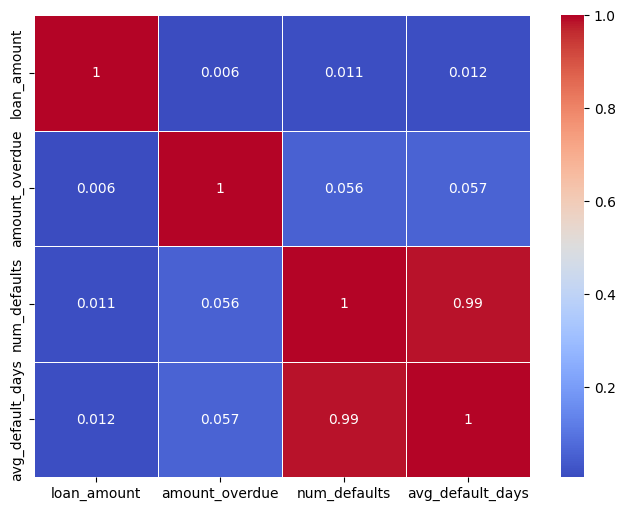

In [77]:
# 2. Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_accounts_train[['loan_amount',
 'amount_overdue',
 'num_defaults',
 'avg_default_days']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.show()

In [78]:
# we see a extremely high correlation between 'Num_defaults' and 'Avg_default_days'. So we are dropping one of the two variables, Right now, droppping avg_default_days
# Remaining correlation is quite low. So we can say that the remaining numerical features are independent of each other

In [79]:
list_of_columns = ["Consumer credit", "Car loan", "Mortgage", "Credit card"]
df_accounts_train['Mapped_credit_type'] = df_accounts_train['credit_type'].apply(lambda x: x if x in list_of_columns else 'Others')

In [142]:
df_accounts_test['Mapped_credit_type'] = df_accounts_test['credit_type'].apply(lambda x: x if x in list_of_columns else 'Others')

In [80]:
df_accounts_train.head(2)

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,Loan_status,num_defaults,avg_default_days,Mapped_credit_type
0,Consumer credit,272745.0,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,closed,1.0,10.0,Consumer credit
1,Consumer credit,4500.0,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,closed,2.0,29.0,Consumer credit


In [81]:
df_accounts_train_2_encoded = pd.get_dummies(df_accounts_train,  columns=['Mapped_credit_type','Loan_status'])

In [146]:
# df_accounts_train.head(2)

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,Loan_status,num_defaults,avg_default_days,Mapped_credit_type
0,Consumer credit,272745.0,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,closed,1.0,10.0,Consumer credit
1,Consumer credit,4500.0,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,closed,2.0,29.0,Consumer credit


In [148]:
df_accounts_test.head(2)

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,num_defaults,avg_default_days,Mapped_credit_type,Loan_status
0,Consumer credit,31630.50,0.0,2014-03-30,2014-11-29,000000000000000000000000,AAA14437029,0.0,0.0,Consumer credit,closed
1,Consumer credit,14613.39,0.0,2014-06-01,2014-11-03,000000000000000,AAA14437029,0.0,0.0,Consumer credit,closed


In [149]:
df_accounts_test_2_encoded = pd.get_dummies(df_accounts_test,  columns=['Mapped_credit_type','Loan_status'])

In [150]:
df_accounts_train_2_encoded.head(2)

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,num_defaults,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,Loan_status_closed,Loan_status_open
0,Consumer credit,272745.0,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,1.0,10.0,0,1,0,0,0,1,0
1,Consumer credit,4500.0,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,2.0,29.0,0,1,0,0,0,1,0


In [151]:
list(df_accounts_train_2_encoded.columns)

['credit_type',
 'loan_amount',
 'amount_overdue',
 'open_date',
 'closed_date',
 'payment_hist_string',
 'uid',
 'num_defaults',
 'avg_default_days',
 'Mapped_credit_type_Car loan',
 'Mapped_credit_type_Consumer credit',
 'Mapped_credit_type_Credit card',
 'Mapped_credit_type_Mortgage',
 'Mapped_credit_type_Others',
 'Loan_status_closed',
 'Loan_status_open']

In [152]:
df_accounts_train_2_encoded[['Mapped_credit_type_Car loan',
 'Mapped_credit_type_Consumer credit', 'Mapped_credit_type_Credit card',
 'Mapped_credit_type_Mortgage', 'Mapped_credit_type_Others', 'Loan_status_closed',
 'Loan_status_open']] = df_accounts_train_2_encoded[['Mapped_credit_type_Car loan',
 'Mapped_credit_type_Consumer credit', 'Mapped_credit_type_Credit card',
 'Mapped_credit_type_Mortgage', 'Mapped_credit_type_Others', 'Loan_status_closed',
 'Loan_status_open']].astype(int)

In [193]:
df_accounts_test_2_encoded[['Mapped_credit_type_Car loan',
 'Mapped_credit_type_Consumer credit', 'Mapped_credit_type_Credit card',
 'Mapped_credit_type_Mortgage', 'Mapped_credit_type_Others', 'Loan_status_closed',
 'Loan_status_open']] = df_accounts_test_2_encoded[['Mapped_credit_type_Car loan',
 'Mapped_credit_type_Consumer credit', 'Mapped_credit_type_Credit card',
 'Mapped_credit_type_Mortgage', 'Mapped_credit_type_Others', 'Loan_status_closed',
 'Loan_status_open']].astype(int)

In [85]:
df_accounts_train_3_encoded = df_accounts_train_2_encoded.drop(columns = ['open_date', 'closed_date','payment_hist_string',"credit_type"])

In [154]:
df_accounts_test_3_encoded = df_accounts_test_2_encoded.drop(columns = ['open_date', 'closed_date','payment_hist_string',"credit_type"])

In [86]:
df_accounts_group_encoded = df_accounts_train_3_encoded.groupby(['uid']).sum().reset_index()

In [155]:
df_accounts_group_test_encoded = df_accounts_test_3_encoded.groupby(['uid']).sum().reset_index()

In [156]:
df_accounts_group_encoded.head(2)

,uid,loan_amount,amount_overdue,num_defaults,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,Loan_status_closed,Loan_status_open
0,AAA09044550,277245.000,0.0,3.0,39.0,0,2,0,0,0,2,0
1,AAA10545297,80996.445,0.0,0.0,0.0,0,0,1,0,0,0,1


In [157]:
print(df_accounts_group_encoded['uid'].nunique())  ## 2,23,918
print(len(df_accounts_group_encoded['uid']))

223918
223918


df_accounts_group_encoded.head(2)

In [89]:
df_train_input_merged = pd.merge(df_accounts_group_encoded, df_merged_encoded_1 ,on = 'uid', how='right')

In [194]:
df_test_input_merged = pd.merge(df_accounts_group_test_encoded, df_merged_encoded_test_1 ,on = 'uid', how='right')

In [195]:
df_test_input_merged.head(2)

,uid,loan_amount,amount_overdue,num_defaults,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,Loan_status_closed,Loan_status_open,NAME_CONTRACT_TYPE,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
0,CMO22835242,10338078.06,0.0,1.0,5.0,1.0,7.0,4.0,1.0,0.0,11.0,2.0,Cash loans,8,1036000,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1
1,MRJ34316727,1769490.00,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,2.0,4.0,Cash loans,1,184000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
df_train_input_merged.head(2)

,uid,loan_amount,amount_overdue,num_defaults,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,Loan_status_closed,Loan_status_open,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
0,AAA08065248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,True,11,2064658,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
1,AAA09044550,277245.0,0.0,3.0,39.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0,True,False,26,2659000,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1


In [91]:
df_train_input_merged.isna().sum()

,0
uid,0
loan_amount,37465
amount_overdue,37465
num_defaults,37465
avg_default_days,37465
Mapped_credit_type_Car loan,37465
Mapped_credit_type_Consumer credit,37465
Mapped_credit_type_Credit card,37465
Mapped_credit_type_Mortgage,37465
Mapped_credit_type_Others,37465


In [92]:
# df_train_input_merged.isna().sum()

In [93]:
# dropping the rows with null values
df_train_input_merged_2 = df_train_input_merged.dropna()

In [196]:
df_test_input_merged_2 = df_test_input_merged.dropna()

In [94]:
df_train_input_merged_2.head(2)

,uid,loan_amount,amount_overdue,num_defaults,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,Loan_status_closed,Loan_status_open,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
1,AAA09044550,277245.000,0.0,3.0,39.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0,True,False,26,2659000,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1
2,AAA10545297,80996.445,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,True,False,14,1317000,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,1


In [95]:
df_train_input_merged_2['NAME_CONTRACT_TYPE_Cash loans'] = df_train_input_merged_2['NAME_CONTRACT_TYPE_Cash loans'].astype('int')
df_train_input_merged_2['NAME_CONTRACT_TYPE_Revolving loans'] = df_train_input_merged_2['NAME_CONTRACT_TYPE_Revolving loans'].astype('int')

<ipython-input-95-260383301069>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_input_merged_2['NAME_CONTRACT_TYPE_Cash loans'] = df_train_input_merged_2['NAME_CONTRACT_TYPE_Cash loans'].astype('int')
<ipython-input-95-260383301069>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_input_merged_2['NAME_CONTRACT_TYPE_Revolving loans'] = df_train_input_merged_2['NAME_CONTRACT_TYPE_Revolving loans'].astype('int')


In [96]:
df_train_input_merged_2.head(2)

,uid,loan_amount,amount_overdue,num_defaults,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,Loan_status_closed,Loan_status_open,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
1,AAA09044550,277245.000,0.0,3.0,39.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0,1,0,26,2659000,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1
2,AAA10545297,80996.445,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,14,1317000,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,1


In [97]:
df_train_input_merged_2[df_train_input_merged_2['TARGET'] == 1]['loan_amount'].describe()

,loan_amount
count,1.725700e+04
mean,1.763182e+06
std,2.608918e+06
min,0.000000e+00
25%,3.015000e+05
50%,9.041265e+05
75%,2.189934e+06
max,5.478038e+07


In [98]:
df_train_input_merged_2[df_train_input_merged_2['TARGET'] == 0]['loan_amount'].describe()

,loan_amount
count,2.066610e+05
mean,1.975998e+06
std,4.371415e+06
min,0.000000e+00
25%,3.488078e+05
50%,9.670320e+05
75%,2.306120e+06
max,1.017958e+09


In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, roc_auc_score, log_loss)




In [100]:
scaler = StandardScaler()

In [101]:
df_train_input_merged_2[['loan_amount','amount_overdue']] = scaler.fit_transform(df_train_input_merged_2[['loan_amount','amount_overdue']])

### Performing standard scaler to work upon outlier treatment in the data

<ipython-input-101-be144bbfef8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_input_merged_2[['loan_amount','amount_overdue']] = scaler.fit_transform(df_train_input_merged_2[['loan_amount','amount_overdue']])


In [198]:
df_test_input_merged_2[['loan_amount','amount_overdue']] = scaler.fit_transform(df_test_input_merged_2[['loan_amount','amount_overdue']])

<ipython-input-198-6c64469ffed1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_input_merged_2[['loan_amount','amount_overdue']] = scaler.fit_transform(df_test_input_merged_2[['loan_amount','amount_overdue']])


In [102]:
# df_train_input_merged_2[['loan_amount','amount_overdue']]

#### Modelling Tasks

In [103]:
from sklearn.model_selection import train_test_split

In [206]:
y = df_train_input_merged_2['TARGET']

X = df_train_input_merged_2.drop(columns = ['TARGET','uid'])

In [258]:
# y_test = df_test_input_merged_2['TARGET']

X_test = df_test_input_merged_2.drop(columns = ['uid'])

In [259]:
X_test.head(2)

,loan_amount,amount_overdue,num_defaults,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,Loan_status_closed,Loan_status_open,NAME_CONTRACT_TYPE,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
0,2.764468,-0.013995,1.0,5.0,1.0,7.0,4.0,1.0,0.0,11.0,2.0,Cash loans,8,1036000,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1
1,-0.054243,-0.013995,0.0,0.0,0.0,1.0,5.0,0.0,0.0,2.0,4.0,Cash loans,1,184000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [204]:
X.head(2)

,loan_amount,amount_overdue,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan,Average_Enquriy,Open_Loan_Share
1,-0.394738,-0.013575,39.0,0.0,2.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,102269.230769,0.0
2,-0.440784,-0.013575,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,1,94071.428571,1.0


In [105]:
df_train_input_merged_2.head(2)

,uid,loan_amount,amount_overdue,num_defaults,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,Loan_status_closed,Loan_status_open,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
1,AAA09044550,-0.394738,-0.013575,3.0,39.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0,1,0,26,2659000,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1
2,AAA10545297,-0.440784,-0.013575,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,14,1317000,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,1


In [106]:
X.head(2)

,loan_amount,amount_overdue,num_defaults,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,Loan_status_closed,Loan_status_open,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
1,-0.394738,-0.013575,3.0,39.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1,0,26,2659000,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1
2,-0.440784,-0.013575,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,14,1317000,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,1


In [107]:
X.corr()

,loan_amount,amount_overdue,num_defaults,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,Loan_status_closed,Loan_status_open,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,count_value,sum_value,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan
loan_amount,1.000000,0.006264,0.102776,0.103767,0.242949,0.238041,0.199673,0.378950,0.027886,0.256978,0.255836,-0.001548,0.001548,-0.002691,-0.001816,-0.001738,-0.000538,-0.001929,-0.000005,-0.004008,-0.001455,0.001889,-0.002457,-0.001793,-0.001278,-0.000675,-0.002046,-0.001057,0.001136,-0.001293,-0.000875,-0.000079
amount_overdue,0.006264,1.000000,0.068159,0.069671,0.001776,0.004768,0.006000,-0.001430,0.001559,0.001970,0.011180,0.002028,-0.002028,-0.001624,-0.002193,0.002697,0.003093,-0.001207,0.004564,-0.002022,0.001408,-0.002352,-0.000180,0.001597,-0.003223,-0.000189,0.000905,-0.001645,-0.004120,-0.002045,-0.000905,0.001051
num_defaults,0.102776,0.068159,1.000000,0.986722,0.048462,0.247488,0.225526,0.034609,0.015186,0.235489,0.245175,0.015287,-0.015287,-0.000917,-0.005784,0.001759,-0.000125,-0.001259,0.005200,-0.002284,0.000029,0.003384,-0.000639,0.001478,-0.000823,0.001299,0.000534,-0.000159,0.000035,-0.000845,-0.004069,-0.000836
avg_default_days,0.103767,0.069671,0.986722,1.000000,0.049422,0.247442,0.227169,0.033740,0.015107,0.235399,0.246666,0.015805,-0.015805,-0.000336,-0.005640,0.002337,-0.000180,-0.000684,0.005801,-0.001541,0.000044,0.003697,-0.000748,0.001680,0.000224,0.001722,0.001054,0.000157,0.000415,-0.000768,-0.004110,-0.000797
Mapped_credit_type_Car loan,0.242949,0.001776,0.048462,0.049422,1.000000,0.022377,0.061607,0.045116,-0.004982,0.112483,0.082829,0.002836,-0.002836,-0.003364,-0.003519,0.000663,-0.001598,-0.000467,-0.000505,-0.002727,-0.004107,0.001019,-0.003444,-0.003448,-0.000400,-0.002460,-0.001929,0.001137,-0.003323,-0.000987,-0.004765,-0.000340
Mapped_credit_type_Consumer credit,0.238041,0.004768,0.247488,0.247442,0.022377,1.000000,0.364137,0.009611,0.048540,0.917819,0.540729,0.043838,-0.043838,-0.000291,-0.015497,0.002988,0.000842,0.002190,0.008144,-0.004604,0.001951,0.000382,-0.004246,-0.000813,0.000448,-0.000098,-0.001030,-0.000527,-0.000366,-0.000475,-0.006679,-0.000994
Mapped_credit_type_Credit card,0.199673,0.006000,0.225526,0.227169,0.061607,0.364137,1.000000,0.028509,0.032003,0.462039,0.698610,0.006404,-0.006404,0.000696,-0.002040,-0.000360,-0.000225,0.000012,0.002439,-0.000327,0.004375,0.000427,-0.001703,-0.000814,-0.000491,0.001555,-0.001151,-0.001891,0.000774,-0.001673,0.002505,-0.001475
Mapped_credit_type_Mortgage,0.378950,-0.001430,0.034609,0.033740,0.045116,0.009611,0.028509,1.000000,-0.003542,0.056270,0.088364,-0.013224,0.013224,-0.001026,0.003972,-0.000069,0.000787,-0.000909,-0.004235,-0.002252,-0.000790,0.000156,-0.003428,0.000654,0.002347,-0.001959,-0.001557,0.000325,0.001859,-0.002124,0.001240,0.000051
Mapped_credit_type_Others,0.027886,0.001559,0.015186,0.015107,-0.004982,0.048540,0.032003,-0.003542,1.000000,0.170081,0.086519,0.000369,-0.000369,0.002353,0.000980,0.003125,0.002641,0.002109,-0.000255,0.002055,0.002141,0.004620,0.002132,-0.004649,0.004864,0.000520,0.001635,-0.001344,-0.001637,0.001427,0.002109,0.003194
Loan_status_closed,0.256978,0.001970,0.235489,0.235399,0.112483,0.917819,0.462039,0.056270,0.170081,1.000000,0.366434,0.037110,-0.037110,-0.000234,-0.013091,0.004218,0.000756,0.0012

In [108]:
X.corr().to_csv("Check_correlation.csv")

In [207]:
X['Average_Enquriy'] = X['sum_value']/X['count_value']

In [260]:
X_test['Average_Enquriy'] = X_test['sum_value']/X_test['count_value']

In [110]:
X['Open_Loan_Share'] = X['Loan_status_open']/(X['Loan_status_closed'] + X['Loan_status_open'])

In [261]:
X_test['Open_Loan_Share'] = X_test['Loan_status_open']/(X_test['Loan_status_closed'] + X_test['Loan_status_open'])

In [237]:
X.drop(columns = ['sum_value', 'count_value', 'NAME_CONTRACT_TYPE_Cash loans','NAME_CONTRACT_TYPE_Revolving loans','Loan_status_closed','Loan_status_open'], inplace=True)

In [266]:
X_test.drop(columns = ['sum_value', 'count_value','Loan_status_closed','Loan_status_open'], inplace=True)

In [264]:
X_test.drop(columns =['NAME_CONTRACT_TYPE'], inplace=True)

In [239]:
X.drop(columns = ['num_defaults'], inplace=True)

In [212]:
X_test.drop(columns = ['num_defaults'], inplace=True)

In [213]:
X.corr().to_csv("Check_correlation_Updated.csv")

In [214]:
### As per the updated correlation, we see there is no high correlation between the variables

In [215]:
#### Since there are two types of loans i.e. Cash loans and revolving loans, ideally we need to consider two models for each cash and revolving loans and determine their propensity
### But since the input data has only distinct UIDs for Cash and revolving loams, and there no no onverlap betweent the two types of loans,
## we can drop the two variables "NAME_CONTACT_TYPE_CASH loans" and "NAME_CONTACT_TYPE_Revolving loans" since the model won't understand the overlap

#### From the correlation chart, there is extremely high correlation between 1) Mapped_credit_type_Consumer credit and Loan_status_closed 2) Count value and sum value. There is extremly high negative corrlation between NAME_CONTRACT_TYPE_Cash loans and NAME_CONTRACT_TYPE_Revolving loans

## As a way to counter high correlation ,we drop Sum_value (i.e enquiry sum value)

In [240]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [241]:
X_train.head(2)

,loan_amount,amount_overdue,avg_default_days,Mapped_credit_type_Car loan,Mapped_credit_type_Consumer credit,Mapped_credit_type_Credit card,Mapped_credit_type_Mortgage,Mapped_credit_type_Others,enquiry_type_Another type of loan,enquiry_type_Car loan,enquiry_type_Cash loan (non-earmarked),enquiry_type_Cash loans,enquiry_type_Consumer credit,enquiry_type_Credit card,enquiry_type_Interbank credit,enquiry_type_Loan for business development,enquiry_type_Loan for purchase of shares (margin lending),enquiry_type_Loan for the purchase of equipment,enquiry_type_Loan for working capital replenishment,enquiry_type_Microloan,enquiry_type_Mobile operator loan,enquiry_type_Mortgage,enquiry_type_Real estate loan,enquiry_type_Revolving loans,enquiry_type_Unknown type of loan,Average_Enquriy
162706,-0.409270,-0.013575,0.0,0.0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11000.00
153531,-0.373209,-0.013575,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,283353.25


In [218]:
# X_train.corr()

In [219]:
#### Applying different models for it

In [220]:
### Through the above data, we assume that there are chances of non-linear relationship between the independent variables/
## Main models considered are  random forest, xgboost, SVM and Neural Network

## Not considering Decision tree for its ability to overfit

## Consideration would be a model with 100% recall

## Since the dataset is imblanaced, the best metrics for model's ability to distinguish 1s and 0s is through AUC score

## Would also be testing the model to check for overfitting or underfitting


In [221]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# model.fit(X_train, y_train)

In [222]:
# y_pred = model.predict(X_val)

# # Evaluate model performance
# accuracy = accuracy_score(y_val, y_pred)
# conf_matrix = confusion_matrix(y_val, y_pred)
# class_report = classification_report(y_val, y_pred)
# precision = precision_score(y_val, y_pred)
# recall = recall_score(y_val, y_pred)
# f1 = f1_score(y_val, y_pred)
# roc_auc = roc_auc_score(y_val, y_pred_proba)
# logloss = log_loss(y_val, y_pred_proba)


# # Print evaluation metrics
# print(f"Accuracy: {accuracy}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-Score: {f1:.4f}")
# print(f"ROC-AUC Score: {roc_auc:.4f}")
# print(f"Log Loss: {logloss:.4f}")


In [223]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
list(X_train.columns)

['loan_amount',
 'amount_overdue',
 'avg_default_days',
 'Mapped_credit_type_Car loan',
 'Mapped_credit_type_Consumer credit',
 'Mapped_credit_type_Credit card',
 'Mapped_credit_type_Mortgage',
 'Mapped_credit_type_Others',
 'enquiry_type_Another type of loan',
 'enquiry_type_Car loan',
 'enquiry_type_Cash loan (non-earmarked)',
 'enquiry_type_Cash loans',
 'enquiry_type_Consumer credit',
 'enquiry_type_Credit card',
 'enquiry_type_Interbank credit',
 'enquiry_type_Loan for business development',
 'enquiry_type_Loan for purchase of shares (margin lending)',
 'enquiry_type_Loan for the purchase of equipment',
 'enquiry_type_Loan for working capital replenishment',
 'enquiry_type_Microloan',
 'enquiry_type_Mobile operator loan',
 'enquiry_type_Mortgage',
 'enquiry_type_Real estate loan',
 'enquiry_type_Revolving loans',
 'enquiry_type_Unknown type of loan',
 'Average_Enquriy']

In [251]:
model = RandomForestClassifier(
    n_estimators=400,             # Number of trees in the forest
    max_depth=20,                 # Maximum depth of the tree
    min_samples_split=5,         # Minimum number of samples required to split an internal node
    min_samples_leaf=20,          # Minimum number of samples required to be at a leaf node
    max_features= 'log2',           # Number of features to consider when looking for the best split (sqrt of total features)
    max_leaf_nodes = 250,
    random_state=42,              # For reproducibility
    class_weight='balanced',       # Helps deal with imbalanced datasets
    bootstrap = True,
    n_jobs = -1,
    verbose = 1,
)

model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.3min finished


RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_features='log2', max_leaf_nodes=250,
                       min_samples_leaf=20, min_samples_split=5,
                       n_estimators=400, n_jobs=-1, random_state=42, verbose=1)

In [252]:
list(X_train.columns)

['loan_amount',
 'amount_overdue',
 'avg_default_days',
 'Mapped_credit_type_Car loan',
 'Mapped_credit_type_Consumer credit',
 'Mapped_credit_type_Credit card',
 'Mapped_credit_type_Mortgage',
 'Mapped_credit_type_Others',
 'enquiry_type_Another type of loan',
 'enquiry_type_Car loan',
 'enquiry_type_Cash loan (non-earmarked)',
 'enquiry_type_Cash loans',
 'enquiry_type_Consumer credit',
 'enquiry_type_Credit card',
 'enquiry_type_Interbank credit',
 'enquiry_type_Loan for business development',
 'enquiry_type_Loan for purchase of shares (margin lending)',
 'enquiry_type_Loan for the purchase of equipment',
 'enquiry_type_Loan for working capital replenishment',
 'enquiry_type_Microloan',
 'enquiry_type_Mobile operator loan',
 'enquiry_type_Mortgage',
 'enquiry_type_Real estate loan',
 'enquiry_type_Revolving loans',
 'enquiry_type_Unknown type of loan',
 'Average_Enquriy']

In [253]:
custom_threshold = 0.50
# y_pred = model.predict(X_val)

y_pred_proba = model.predict_proba(X_val)[:, 1]
y_pred = (y_pred_proba >= custom_threshold).astype(int)


# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"ROC-AUC Score: {roc_auc:.4f}")
# print(f"Log Loss: {logloss:.4f}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    4.2s finished


Accuracy: 0.6320560914612362
Confusion Matrix:
 [[26728 14605]
 [ 1873  1578]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.65      0.76     41333
           1       0.10      0.46      0.16      3451

    accuracy                           0.63     44784
   macro avg       0.52      0.55      0.46     44784
weighted avg       0.87      0.63      0.72     44784

ROC-AUC Score: 0.5761


In [255]:
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[26728 14605]
 [ 1873  1578]]


In [269]:
y_predict = model.predict(X_test.drop(columns = ['Open_Loan_Share','num_defaults']))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    2.4s finished


In [278]:
len(y_predict)

39572

In [279]:
df_test_input_merged_2.shape

(39572, 32)

In [280]:
df_test_input_merged_2['Predicted_Output'] = y_predict

<ipython-input-280-9409189a4313>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_input_merged_2['Predicted_Output'] = y_predict


In [282]:
df_test_input_merged_2[['uid','Predicted_Output']].to_csv("Submission_Output.csv")

In [ ]:
### Performing hyper parameter tuning using Grid Search CV

In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.feature_selection import RFE

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'scale_pos_weight': [5, 10, 15],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0, 0.5, 1],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='roc_auc', cv=5, verbose=1)

grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print(f"Best Parameters: {grid_search}")

In [ ]:
rfe = RFE(estimator=model, n_features_to_select=15)

In [ ]:
rfe.fit(X_train, y_train)

In [ ]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# model = XGBClassifier()
# model.fit(X_train, y_train)

In [ ]:
model = xgb.XGBClassifier(
    n_estimators=300,          # Increase number of trees
    max_depth=4,               # Control model complexity
    learning_rate=0.05,        # Smaller learning rate
    subsample=0.8,             # Sample ratio
    colsample_bytree=0.8,      # Feature ratio
    scale_pos_weight=5,        # Increase weight for the minority class (bad loans)
    gamma=1,                   # Minimum loss reduction for partitioning
    use_label_encoder=False,
    eval_metric='logloss'
)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:32:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
custom_threshold = 0.5
# y_pred = model.predict(X_val)
y_pred = (y_pred_proba >= custom_threshold).astype(int)

y_pred_proba = model.predict_proba(X_val)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"ROC-AUC Score: {roc_auc:.4f}")
# print(f"Log Loss: {logloss:.4f}")

Accuracy: 0.6156216505894962
Confusion Matrix:
 [[26008 15325]
 [ 1889  1562]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75     41333
           1       0.09      0.45      0.15      3451

    accuracy                           0.62     44784
   macro avg       0.51      0.54      0.45     44784
weighted avg       0.87      0.62      0.71     44784

ROC-AUC Score: 0.5758


In [ ]:
# y_val.sum()

NameError: name 'y_val' is not defined

In [ ]:
from sklearn.model_selection import  GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'scale_pos_weight': [5, 10, 15],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0, 0.5, 1],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='roc_auc', cv=5, verbose=1)

grid_search.fit(X_train, y_train)


In [ ]:
# Best parameters from grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

NameError: name 'grid_search' is not defined

In [ ]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Make predictions
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= 0.3).astype(int)  # Adjust threshold for recall

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'AUC-ROC: {roc_auc:.2f}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

In [ ]:
# print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_res, y_train_res)

In [ ]:
# Get predicted probabilities for the positive class
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

In [ ]:
y_pred = model.predict(X_val)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
logloss = log_loss(y_val, y_pred_proba)


# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Log Loss: {logloss:.4f}")

NameError: name 'X_val' is not defined

In [ ]:
### Using Neural Network

NameError: name 'X_train' is not defined

In [ ]:
model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=2)

In [ ]:
y_pred = model.predict(X_val)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
logloss = log_loss(y_val, y_pred_proba)


# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Log Loss: {logloss:.4f}")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [131]:
#### Preparing the test data for evaluation